In [1]:
# prevent cuda error
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [2]:
import tensorflow
import numpy
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils

In [3]:
# tutorial from:
# https://stackabuse.com/image-recognition-in-python-with-tensorflow-and-keras/

In [4]:
# Set random seed for purposes of reproducibility
seed = 21

In [5]:
# prepare data
from keras.datasets import cifar10

In [6]:
# Loading the data 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 95s 1us/step


In [7]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
# One-hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [9]:
# Design the CNN-model:
# Create a model: sequential is the most commonly used
model = keras.Sequential()

In [10]:

#
model.add(keras.layers.Conv2D(32, 3, input_shape=(32, 32, 3), activation='relu', padding='same'))
#  ( filter size = 32 , 
#    filter layers = 3 ,
#   "relu" is very commonly used
#   padding = 'same' means picture size stays the same
model.add(keras.layers.Dropout(0.2)) # 20% of neural connection removed to avoid overfitting
model.add(keras.layers.BatchNormalization())

# cave: filter size is increasing by factor 2 (reduction of computational resources?) 
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
    
model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(class_num, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        2

In [11]:
numpy.random.seed(seed)
# lepoches set to 15 (instead of 25 because it would neet to long)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=64)


Epoch 1/15
782/782 [==============================] - 263s 332ms/step - loss: 1.5633 - accuracy: 0.4440 - val_loss: 1.1415 - val_accuracy: 0.5843
Epoch 2/15
782/782 [==============================] - 339s 434ms/step - loss: 1.1319 - accuracy: 0.6006 - val_loss: 0.9044 - val_accuracy: 0.6812
Epoch 3/15
782/782 [==============================] - 376s 480ms/step - loss: 0.9821 - accuracy: 0.6590 - val_loss: 0.9904 - val_accuracy: 0.6591
Epoch 4/15
782/782 [==============================] - 295s 378ms/step - loss: 0.8877 - accuracy: 0.6920 - val_loss: 0.7629 - val_accuracy: 0.7346
Epoch 5/15
782/782 [==============================] - 265s 339ms/step - loss: 0.8194 - accuracy: 0.7159 - val_loss: 0.7415 - val_accuracy: 0.7368
Epoch 6/15
782/782 [==============================] - 256s 327ms/step - loss: 0.7755 - accuracy: 0.7326 - val_loss: 0.6784 - val_accuracy: 0.7655
Epoch 7/15
782/782 [==============================] - 254s 325ms/step - loss: 0.7388 - accuracy: 0.7465 - val_loss: 0.6536 -

In [12]:
model.evaluate(X_test, y_test, verbose=0)

[0.6267770528793335, 0.7833999991416931]

In [15]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 78.34%


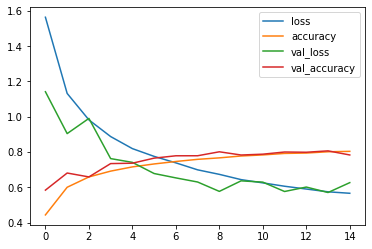

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.show()
